<a href="https://colab.research.google.com/github/Ronbragaglia/ColabPython/blob/main/exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 23970 (93.63 KB)
Trainable params: 23970 (93.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6035 - accu

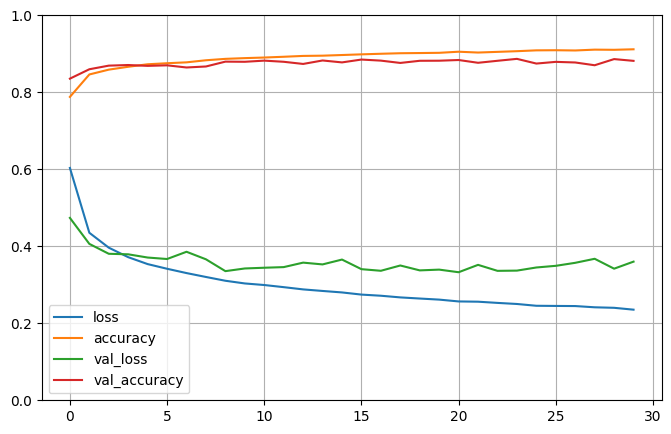

1/1 [==============================] - 0s 85ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Bota' 'Blusa' 'Calça']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ['Camiseta', 'Calça', 'Blusa', 'Vestido', 'Casaco', 'Sapato', 'Camisa', 'Tênis', 'Mochila', 'Bota']

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(np.array(class_names)[y_pred])
